In [35]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap

data = []
alamat = "https://www.bmkg.go.id/gempabumi/gempabumi-terkini.bmkg"

html = urlopen(alamat)
data = BeautifulSoup(html, 'html.parser')
items = data.findAll('table', {'class':"table table-hover table-striped"})

header = [th.text.rstrip() for th in items[0].find_all('th')]

In [40]:
xpath = '/html/body/div[1]/div[3]/div/div[1]/div/div/table/tbody/'

In [41]:
xpath

'/html/body/div[1]/div[3]/div/div[1]/div/div/table/tbody/'

In [36]:
header

['#', 'Waktu Gempa', 'Lintang', 'Bujur', 'Magnitudo', 'Kedalaman', 'Wilayah']

In [3]:
items

[<table class="table table-hover table-striped">
 <thead>
 <tr>
 <th>#</th>
 <th>Waktu Gempa</th>
 <th>Lintang</th>
 <th>Bujur</th>
 <th>Magnitudo</th>
 <th>Kedalaman</th>
 <th>Wilayah</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td>1</td>
 <td>21-Dec-20 <br/>19:33:57 WIB</td>
 <td>-6.5</td>
 <td>130.65</td>
 <td>5.1</td>
 <td>50 Km</td>
 <td>178 km BaratLaut MALUKUTENGGARABRT</td>
 </tr>
 <tr>
 <td>2</td>
 <td>17-Dec-20 <br/>15:30:50 WIB</td>
 <td>0.23</td>
 <td>125.01</td>
 <td>5.1</td>
 <td>24 Km</td>
 <td>73 km Tenggara TUTUYAN-BOLTIM-SULUT</td>
 </tr>
 <tr>
 <td>3</td>
 <td>16-Dec-20 <br/>06:21:58 WIB</td>
 <td>5.21</td>
 <td>125.43</td>
 <td>6.2</td>
 <td>10 Km</td>
 <td>177 km BaratLaut TAHUNA-KEP.SANGIHE-SULUT</td>
 </tr>
 <tr>
 <td>4</td>
 <td>13-Dec-20 <br/>15:39:52 WIB</td>
 <td>-9.83</td>
 <td>109.65</td>
 <td>5.4</td>
 <td>22 Km</td>
 <td>228 km BaratDaya BANTUL-DIY</td>
 </tr>
 <tr>
 <td>5</td>
 <td>13-Dec-20 <br/>00:10:06 WIB</td>
 <td>-6.69</td>
 <td>131.03</td>
 <td>5.0</td>

In [4]:
#scarp the data and append to respective list
c1=[]
c2=[]
c3=[]
c4=[]
c5=[]
c6=[]
c7=[]

for row in data.findAll('tr'):
    cells = row.findAll('td')
    if len(cells)==7: #only extract table not heading
        c1.append(cells[0].find(text=True))
        c2.append(cells[1].find(text=True))
        c3.append(cells[2].find(text=True))
        c4.append(cells[3].find(text=True))
        c5.append(cells[4].find(text=True))
        c6.append(cells[5].find(text=True))
        c7.append(cells[6].find(text=True))
        
#create dictionary
d = dict([(x,0)for x in header])
d

{'#': 0,
 'Waktu Gempa': 0,
 'Lintang': 0,
 'Bujur': 0,
 'Magnitudo': 0,
 'Kedalaman': 0,
 'Wilayah': 0}

In [5]:
d['No'] = c1
d['Waktu'] = c2
d['Lintang'] = c3
d['Bujur'] = c4
d['Magnitudo'] = c5
d['Kedalaman'] = c6
d['Wilayah'] = c7

d = {} 
  
# Adding list as value 
d['No'] = c1
d['Waktu'] = c2
d['Lintang'] = c3
d['Bujur'] = c4
d['Magnitudo'] = c5
d['Kedalaman'] = c6
d['Wilayah'] = c7

In [6]:
df_table = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))
df_table.tail()

,No,Waktu,Lintang,Bujur,Magnitudo,Kedalaman,Wilayah
55,56,07-Oct-20,-10.61,121.11,5.1,29 Km,74 km Tenggara WULA-WAIJELU-NTT
56,57,06-Oct-20,-9.31,112.93,5.0,10 Km,134 km BaratDaya LUMAJANG-JATIM
57,58,05-Oct-20,-9.79,119.53,5.1,29 Km,17 km Tenggara WANOKAKA-NTT
58,59,02-Oct-20,-6.4,130.79,5.2,122 Km,183 km BaratLaut MALUKUTENGGARABRT
59,60,28-Sep-20,-11.46,117.94,5.3,10 Km,237 km BaratDaya KODI-SUMBABARATDAYA-NTT


In [7]:
print(df_table.iloc[:,4].astype(float).mean())
print(df_table.iloc[:,4].astype(float).max())

5.281666666666666
6.3


In [8]:
#df_table1[['lon','lat']] = df_table1.Koordinat.str.split(" ",expand=True,)
df_table['lon'] = pd.to_numeric(df_table.Bujur, errors='coerce')
df_table['lat'] = pd.to_numeric(df_table.Lintang, errors='coerce')

In [9]:
df_table.info

<bound method DataFrame.info of     No       Waktu Lintang   Bujur Magnitudo Kedalaman  \
0    1  21-Dec-20     -6.5  130.65       5.1     50 Km   
1    2  17-Dec-20     0.23  125.01       5.1     24 Km   
2    3  16-Dec-20     5.21  125.43       6.2     10 Km   
3    4  13-Dec-20    -9.83  109.65       5.4     22 Km   
4    5  13-Dec-20    -6.69  131.03       5.0     90 Km   
5    6  12-Dec-20    -9.29  123.44       5.4    107 Km   
6    7  10-Dec-20     1.64  126.29       5.1     10 Km   
7    8  05-Dec-20    -7.84  128.34       5.5     10 Km   
8    9  05-Dec-20     5.29   93.86       5.0     10 Km   
9   10  04-Dec-20     3.15   98.16       5.4    131 Km   
10  11  03-Dec-20    -3.41  123.37       5.3     10 Km   
11  12  01-Dec-20     2.97   96.04       5.0     26 Km   
12  13  29-Nov-20    -4.97  102.93       5.1     10 Km   
13  14  25-Nov-20     1.85  127.28       5.4     77 Km   
14  15  24-Nov-20    -2.31  128.03       5.1     10 Km   
15  16  22-Nov-20    -2.43  127.53      

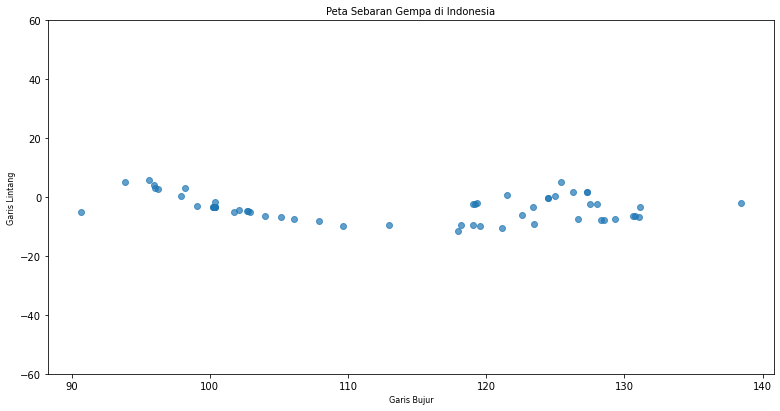

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = df_table['lon']
y = df_table['lat']

plt.figure(figsize=(13,6.5))
plt.scatter(x, y, alpha = 0.7)
plt.title('Peta Sebaran Gempa di Indonesia', fontsize=10)
plt.ylim(-60, 60)
plt.xlabel('Garis Bujur', fontsize=8)
plt.ylabel('Garis Lintang', fontsize=8)

plt.show()

In [11]:
df_table

,No,Waktu,Lintang,Bujur,Magnitudo,Kedalaman,Wilayah,lon,lat
0,1,21-Dec-20,-6.5,130.65,5.1,50 Km,178 km BaratLaut MALUKUTENGGARABRT,130.65,-6.50
1,2,17-Dec-20,0.23,125.01,5.1,24 Km,73 km Tenggara TUTUYAN-BOLTIM-SULUT,125.01,0.23
2,3,16-Dec-20,5.21,125.43,6.2,10 Km,177 km BaratLaut TAHUNA-KEP.SANGIHE-SULUT,125.43,5.21
3,4,13-Dec-20,-9.83,109.65,5.4,22 Km,228 km BaratDaya BANTUL-DIY,109.65,-9.83
4,5,13-Dec-20,-6.69,131.03,5.0,90 Km,145 km BaratLaut MALUKUTENGGARABRT,131.03,-6.69
5,6,12-Dec-20,-9.29,123.44,5.4,107 Km,91 km BaratDaya LEMBATA-NTT,123.44,-9.29
6,7,10-Dec-20,1.64,126.29,5.1,10 Km,131 km TimurLaut BITUNG-SULUT,126.29,1.64
7,8,05-Dec-20,-7.84,128.34,5.5,10 Km,70 km TimurLaut MALUKUBRTDAYA,128.34,-7.84
8,9,05-Dec-20,5.29,93.86,5.0,10 Km,165 km BaratDaya BANDAACEH-ACEH,93.86,5.29
9,10,04-Dec-20,3.15,98.16,5.4,131 Km,37 km BaratLaut KAB-KARO-SUMUT,98.16,3.15


In [12]:
future = df_table.reset_index()
future

,index,No,Waktu,Lintang,Bujur,Magnitudo,Kedalaman,Wilayah,lon,lat
0,0,1,21-Dec-20,-6.5,130.65,5.1,50 Km,178 km BaratLaut MALUKUTENGGARABRT,130.65,-6.50
1,1,2,17-Dec-20,0.23,125.01,5.1,24 Km,73 km Tenggara TUTUYAN-BOLTIM-SULUT,125.01,0.23
2,2,3,16-Dec-20,5.21,125.43,6.2,10 Km,177 km BaratLaut TAHUNA-KEP.SANGIHE-SULUT,125.43,5.21
3,3,4,13-Dec-20,-9.83,109.65,5.4,22 Km,228 km BaratDaya BANTUL-DIY,109.65,-9.83
4,4,5,13-Dec-20,-6.69,131.03,5.0,90 Km,145 km BaratLaut MALUKUTENGGARABRT,131.03,-6.69
5,5,6,12-Dec-20,-9.29,123.44,5.4,107 Km,91 km BaratDaya LEMBATA-NTT,123.44,-9.29
6,6,7,10-Dec-20,1.64,126.29,5.1,10 Km,131 km TimurLaut BITUNG-SULUT,126.29,1.64
7,7,8,05-Dec-20,-7.84,128.34,5.5,10 Km,70 km TimurLaut MALUKUBRTDAYA,128.34,-7.84
8,8,9,05-Dec-20,5.29,93.86,5.0,10 Km,165 km BaratDaya BANDAACEH-ACEH,93.86,5.29
9,9,10,04-Dec-20,3.15,98.16,5.4,131 Km,37 km BaratLaut KAB-KARO-SUMUT,98.16,3.15


In [13]:
future.set_index(['lat', 'lon'], inplace=True)
future.head()

,,index,No,Waktu,Lintang,Bujur,Magnitudo,Kedalaman,Wilayah
lat,lon,,,,,,,,
-6.50,130.65,0,1,21-Dec-20,-6.5,130.65,5.1,50 Km,178 km BaratLaut MALUKUTENGGARABRT
0.23,125.01,1,2,17-Dec-20,0.23,125.01,5.1,24 Km,73 km Tenggara TUTUYAN-BOLTIM-SULUT
5.21,125.43,2,3,16-Dec-20,5.21,125.43,6.2,10 Km,177 km BaratLaut TAHUNA-KEP.SANGIHE-SULUT
-9.83,109.65,3,4,13-Dec-20,-9.83,109.65,5.4,22 Km,228 km BaratDaya BANTUL-DIY
-6.69,131.03,4,5,13-Dec-20,-6.69,131.03,5.0,90 Km,145 km BaratLaut MALUKUTENGGARABRT


In [14]:
future = future.to_xarray()
future

<xarray.Dataset>
Dimensions:    (lat: 57, lon: 60)
Coordinates:
  * lat        (lat) float64 -11.46 -10.61 -9.83 -9.79 ... 4.06 5.21 5.29 5.69
  * lon        (lon) float64 90.69 93.86 95.56 95.94 ... 130.8 131.0 131.1 138.4
Data variables:
    index      (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    No         (lat, lon) object nan nan nan nan nan nan ... nan nan nan nan nan
    Waktu      (lat, lon) object nan nan nan nan nan nan ... nan nan nan nan nan
    Lintang    (lat, lon) object nan nan nan nan nan nan ... nan nan nan nan nan
    Bujur      (lat, lon) object nan nan nan nan nan nan ... nan nan nan nan nan
    Magnitudo  (lat, lon) object nan nan nan nan nan nan ... nan nan nan nan nan
    Kedalaman  (lat, lon) object nan nan nan nan nan nan ... nan nan nan nan nan
    Wilayah    (lat, lon) object nan nan nan nan nan nan ... nan nan nan nan nan

In [15]:
future1=future.Magnitudo[:]
future2 = future1.astype(np.float)
future2

<xarray.DataArray 'Magnitudo' (lat: 57, lon: 60)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, 5. , nan, ..., nan, nan, nan],
       [nan, nan, 5.3, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 -11.46 -10.61 -9.83 -9.79 ... 4.06 5.21 5.29 5.69
  * lon      (lon) float64 90.69 93.86 95.56 95.94 ... 130.8 131.0 131.1 138.4

In [16]:
future.lat

<xarray.DataArray 'lat' (lat: 57)>
array([-11.46, -10.61,  -9.83,  -9.79,  -9.53,  -9.5 ,  -9.31,  -9.29,  -8.22,
        -7.84,  -7.73,  -7.57,  -7.28,  -7.27,  -6.74,  -6.69,  -6.5 ,  -6.4 ,
        -6.33,  -6.02,  -5.21,  -5.13,  -4.97,  -4.88,  -4.61,  -4.27,  -3.41,
        -3.34,  -3.33,  -3.31,  -3.3 ,  -3.28,  -3.26,  -3.25,  -3.21,  -2.87,
        -2.43,  -2.32,  -2.31,  -2.24,  -1.98,  -1.91,  -1.81,  -0.3 ,   0.23,
         0.27,   0.59,   1.64,   1.77,   1.85,   2.88,   2.97,   3.15,   4.06,
         5.21,   5.29,   5.69])
Coordinates:
  * lat      (lat) float64 -11.46 -10.61 -9.83 -9.79 ... 4.06 5.21 5.29 5.69

In [17]:
lon =future.lon
lat=future.lat


minlon = min(lon)
minlat = min(lat)
maxlon = max(lon)
maxlat = max(lat)


In [18]:
m = Basemap(projection='mill',
            llcrnrlon=minlon,
            llcrnrlat=minlat,
            urcrnrlon=maxlon,
            urcrnrlat=maxlat,
            resolution='i')

x,y= np.meshgrid(lon,lat) # for this dataset, longitude is 0 through 360, so you need to subtract 180 to properly display on map
xx,yy = m(x,y)

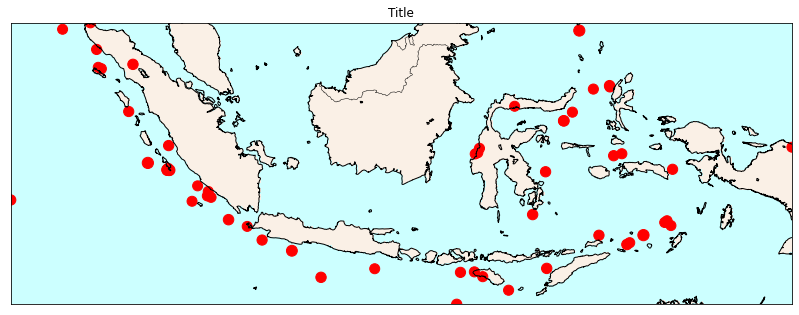

In [19]:
plt.figure(figsize=(14,7))
m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.drawlsmask(land_color='Linen', ocean_color='#CCFFFF') # can use HTML names or codes for colors
m.drawcounties() # you can even add counties (and other shapefiles!)



temp = m.scatter(xx,yy,s=future2*20, color='r')
#cb = m.colorbar(temp,"bottom", size="5%", pad="2%")
plt.title('Title')
#cb.set_label('Bar')
plt.show()

In [42]:
import folium
from folium import plugins
latitude = 0
longitude = 115

ind_map = folium.Map(location=[latitude, longitude], zoom_start=4)

incident = plugins.MarkerCluster().add_to(ind_map)

for lat, lng, label, in zip(df_table.Lintang, df_table.Bujur, df_table.Magnitudo):
    folium.Marker(location=[lat, lng],
                 icon=None,
                 popup=label,).add_to(incident)
    
ind_map